### Imports librerias, clases, algoritmos, etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.externals import joblib
from sklearn.feature_selection import SelectKBest  #feature selection best features
from sklearn.feature_selection import chi2         # clase chi-cuadrado 
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder    # instantiate labelencoder
from sklearn.feature_selection import f_classif    #clase f_clasificador ANOVA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso



In [61]:
ds = pd.read_csv('/data/UMG/ProDeGree/Grad I/inguat/BD_TI_UNIDA_Nov_2018_Transpuesta.csv', encoding='ISO-8859-1') #-------------importando dataset#
ds.info()   #--------------------------------informacion general del set
ds.shape
#print(ds.isnull().sum()) #------------------Despliega las columnas con datos nulos 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Columns: 225 entries, id to P27_DG_SUMA
dtypes: float64(89), int64(6), object(130)
memory usage: 8.1+ MB


/home/itsky/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11,12,19,37,46,80,81,87,88,94,95,115,116,128,129,134,166,172,175,176,180,181,182,186,198,200,201) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(4706, 225)

In [134]:
ds.isnull().sum()

id                      0
ID_COR                  0
SEC_INT                 0
P1                      0
P2$01                   3
P2$02                2183
P2$03                3791
P2$04                4361
P2$05                4580
P2$06                4646
P2$07                4685
P2$08                4694
P2$09                4703
P2$10                4706
P2$11                4706
P2$12                4706
P2$13                4706
P2$14                4706
P2$15                4706
P3$01                4696
P3$02                4706
P3$03                4706
P3$04                4706
P3$05                4706
P3$06                4706
P3$07                4706
P3$08                4706
P3$09                4706
P3$10                4706
P3_OTR               4700
P4                      0
P5                   4700
P6_DEP               3654
P6_MUN               3654
DEPTO_MUNI           3654
P7_1                 3796
P7_1_2               4427
P7_1_2_OTR           4700
P7_1_3      

In [135]:
#ds.loc[ 1:21, ['ID_COR','P2$02','P2$03','P2$04','P2$05']]
#ds['P2$10'].value_counts()
pd.set_option('display.max_rows', 4706)

# --------------eliminar columnas no significativas 
ds=ds.drop(['P2$10','P2$11','P2$12','P2$13','P2$14','P2$15','P7_1_5_A','P7_1_5_B','P7_1_5_C','P7_1_5_D','P7_2_6_A','P7_2_6_B','P7_2_6_C','P7_2_6_D'], axis = 1)
ds=ds.drop(['P18_ESTADIA_4','P18_ESTADIA_5','P18_ESTADIA_6','P18_ESTADIA_7','P19_GRUPO_5','P19_GRUPO_6','P19_GRUPO_7'], axis=1)
ds=ds.drop(['P20_MOTIVO_OTR_2','P20_MOTIVO_OTR_3','P20_MOTIVO_OTR_4','P20_MOTIVO_OTR_5','P20_MOTIVO_OTR_6','P20_MOTIVO_OTR_7'], axis=1)
ds= ds.drop(['P21_ALOJ_7','P21_ALOJ_OTR_3','P21_ALOJ_OTR_5','P21_ALOJ_OTR_6','P21_ALOJ_OTR_7' ],axis=1)
ds = ds.drop(['P22_PER_GAS_6','P22_PER_GAS_7','P23_ACT_4_5','P23_ACT_5_5','P23_ACT_6_3','P23_ACT_6_4','P23_ACT_6_5','P23_ACT_7_3'], axis=1)
ds = ds.drop(['P23_ACT_7_5','P19_NO_HOMBRES','P19_NO_MUJERES','P24_SER_PT_7','P24_SER_PT_8'],axis=1)
ds = ds.drop(['P27_DG_1_2', 'P27_DG_2_2', 'P27_DG_3_2', 'P27_DG_4_2', 'P27_DG_5_2', 'P27_DG_6_2', 'P27_DG_7_2', 'P27_DG_8_2', 'P27_DG_9_2'], axis=1)
ds = ds.drop(['P7_1_2_OTR','P10_DEP','P10_MUN','P10_LUG','P17_LUG_6','P17_LUG_7','P20_MOTIVO_6','P20_MOTIVO_7'], axis=1)
ds = ds.drop(['P21_ALOJ_5', 'P21_ALOJ_6', 'P21_ALOJ_OTR_4', 'P23_ACT_1_1', 'P23_ACT_1_2', 'P23_ACT_1_3', 'P23_ACT_1_4', 'P23_ACT_1_5', 'OTR_ACT_1_OTR', 'P23_ACT_2_1', 'P23_ACT_2_2', 'P23_ACT_2_3', 'P23_ACT_2_4', 'P23_ACT_2_5', 'OTR_ACT_2_OTR', 'P23_ACT_3_1', 'P23_ACT_3_2', 'P23_ACT_3_3', 'P23_ACT_3_4', 'P23_ACT_3_5', 'OTR_ACT_3_OTR', 'P23_ACT_4_1', 'P23_ACT_4_2', 'P23_ACT_4_3', 'P23_ACT_4_4', 'OTR_ACT_4_OTR', 'P23_ACT_5_1', 'P23_ACT_5_2', 'P23_ACT_5_3', 'P23_ACT_5_4', 'OTR_ACT_5_OTR', 'P23_ACT_6_1', 'P23_ACT_6_2', 'OTR_ACT_6_OTR', 'P23_ACT_7_1', 'P23_ACT_7_2', 'OTR_ACT_7_OTR'], axis=1)
ds = ds.drop(['P25_RES_IND_98', 'P27_DG_1_1', 'P27_DG_2_1', 'P27_DG_3_1', 'P27_DG_4_1', 'P27_DG_5_1', 'P27_DG_6_1', 'P27_DG_7_1','P27_DG_8_1', 'P27_DG_9_1', 'P27_DG_OTR_1', 'P27_DG_OTR_2'], axis=1)

null_columns=ds.columns[ds.isnull().any()]
ds.isnull().sum()
#ds['P2$10'].value_counts()

id                      0
ID_COR                  0
SEC_INT                 0
P1                      0
P2$01                   3
P2$02                2183
P2$03                3791
P2$04                4361
P2$05                4580
P2$06                4646
P2$07                4685
P2$08                4694
P2$09                4703
P3$01                4696
P3$02                4706
P3$03                4706
P3$04                4706
P3$05                4706
P3$06                4706
P3$07                4706
P3$08                4706
P3$09                4706
P3$10                4706
P3_OTR               4700
P4                      0
P5                   4700
P6_DEP               3654
P6_MUN               3654
DEPTO_MUNI           3654
P7_1                 3796
P7_1_2               4427
P7_1_3               4433
P7_1_4               4430
P7_2                 3796
P7_2_3               3895
P7_2_3_OTR           4691
P7_2_4               3895
P7_2_5               3895
P9          

In [136]:
ds=ds.drop(['P3$02','P3$03','P3$04','P3$05','P3$06','P3$07','P3$08','P3$09','P3$10','P3_OTR'], axis=1)
ds['P17_2'] = ds['P17_DEPTO_2'] +'_'+ ds['P17_MUNI_2'] +'_'+ ds['P17_LUG_2']
ds['P17_3'] = ds['P17_DEPTO_3'] +'_'+ ds['P17_MUNI_3'] +'_'+ ds['P17_LUG_3']
ds['P17_4'] = ds['P17_DEPTO_4'] +'_'+ ds['P17_MUNI_4'] +'_'+ ds['P17_LUG_4']
ds['P17_5'] = ds['P17_DEPTO_5'] +'_'+ ds['P17_MUNI_5'] +'_'+ ds['P17_LUG_5']
ds['P17_1'] = ds['P17_DEPTO_1'] +'_'+ ds['P17_MUNI_1'] +'_'+ ds['P17_LUG_1']

categorical_cols = ds.columns[ds.dtypes==object].tolist()
numerical_cols = ds.columns[ds.dtypes==int].tolist()
float_cols = ds.columns[ds.dtypes== float].tolist()

#ds[['ID_COR','P17_1', 'P17_2','P17_3','P17_4','P17_5']]
#ds.iloc[:,[1,7,8,9,10]]
#ds.describe()
#ds = ds.loc[:, ~ds.isnull().all()]

#ds=ds.dropna(axis=1, thresh=300) 
ds.isnull().sum()

id                      0
ID_COR                  0
SEC_INT                 0
P1                      0
P2$01                   3
P2$02                2183
P2$03                3791
P2$04                4361
P2$05                4580
P2$06                4646
P2$07                4685
P2$08                4694
P2$09                4703
P3$01                4696
P4                      0
P5                   4700
P6_DEP               3654
P6_MUN               3654
DEPTO_MUNI           3654
P7_1                 3796
P7_1_2               4427
P7_1_3               4433
P7_1_4               4430
P7_2                 3796
P7_2_3               3895
P7_2_3_OTR           4691
P7_2_4               3895
P7_2_5               3895
P9                   2074
DEP_MUN_LUG             0
P11                  2080
P11_OTR              4525
P13                  2080
P14                  2077
P16                     2
PB                      0
PC                      0
PD                      0
SUMA_PUNTOS 

In [137]:
ds = ds.drop(['P17_DEPTO_1','P17_MUNI_1', 'P17_LUG_1','P17_DEPTO_2','P17_MUNI_2', 'P17_LUG_2','P17_DEPTO_3','P17_MUNI_3', 'P17_LUG_3'], axis=1)
ds = ds.drop(['P17_DEPTO_4','P17_MUNI_4', 'P17_LUG_4','P17_DEPTO_5','P17_MUNI_5', 'P17_LUG_5'], axis=1)
ds = ds.drop(['P17_DEPTO_6','P17_MUNI_6','P17_DEPTO_7','P17_MUNI_7'], axis=1)

#ds.value_counts()
ds.isnull().sum()

id                      0
ID_COR                  0
SEC_INT                 0
P1                      0
P2$01                   3
P2$02                2183
P2$03                3791
P2$04                4361
P2$05                4580
P2$06                4646
P2$07                4685
P2$08                4694
P2$09                4703
P3$01                4696
P4                      0
P5                   4700
P6_DEP               3654
P6_MUN               3654
DEPTO_MUNI           3654
P7_1                 3796
P7_1_2               4427
P7_1_3               4433
P7_1_4               4430
P7_2                 3796
P7_2_3               3895
P7_2_3_OTR           4691
P7_2_4               3895
P7_2_5               3895
P9                   2074
DEP_MUN_LUG             0
P11                  2080
P11_OTR              4525
P13                  2080
P14                  2077
P16                     2
PB                      0
PC                      0
PD                      0
SUMA_PUNTOS 

In [138]:
ds = ds.drop(['P6_DEP','P6_MUN','P20_MOTIVO_4','P20_MOTIVO_5','P20_MOTIVO_OTR_1','P21_ALOJ_4','P21_ALOJ_OTR_1','P21_ALOJ_OTR_2'], axis=1)
ds = ds.drop(['P22_PER_GAS_4', 'P22_PER_GAS_5','P23_ACT_7_4','P24_SER_PT_1','P24_SER_PT_2','P24_SER_PT_3','P24_SER_PT_4','P24_SER_PT_5','P24_SER_PT_6'], axis=1)
ds = ds.drop(['P26_TRASPORTE_OTR'], axis=1)

ds.isnull().sum()


id                   0
ID_COR               0
SEC_INT              0
P1                   0
P2$01                3
P2$02             2183
P2$03             3791
P2$04             4361
P2$05             4580
P2$06             4646
P2$07             4685
P2$08             4694
P2$09             4703
P3$01             4696
P4                   0
P5                4700
DEPTO_MUNI        3654
P7_1              3796
P7_1_2            4427
P7_1_3            4433
P7_1_4            4430
P7_2              3796
P7_2_3            3895
P7_2_3_OTR        4691
P7_2_4            3895
P7_2_5            3895
P9                2074
DEP_MUN_LUG          0
P11               2080
P11_OTR           4525
P13               2080
P14               2077
P16                  2
PB                   0
PC                   0
PD                   0
SUMA_PUNTOS          0
NSE                  0
NOMBRE               6
EDAD                 0
PROFESION            3
OCUPACION            0
GENERO               0
Índice1    

In [139]:
#ds.rename(columns={"P4":"P4_2CASA", "DEPTO_MUNI":"P6_2C_UBICA"}, inplace=True)
ds.rename(columns={'P7_1': 'P7_NO_PERNOC', 'P7_1_2':'P7_MOTIVO_NOPERNOC','P7_1_3':'P7_GASTO_NOPERNOC','P7_1_4':'P7_#PER_NOPERNOC'},inplace=True)
ds.rename(columns={'P7_2':'P7_SI_PERNOC','P7_2_3':'P7_MOTIVO_SIPERNOC', 'P7_2_4':'P7_GASTO_SIPERNOC', 'P7_2_5':'P7_#PER_SIPERNOC'},inplace=True)
ds.rename(columns={'P9':'P9_#EXCURSION', 'P11':'P11_MOTIVO_EXCURSION', 'P13':'P13_GASTO_EXCURSION','P14':'P14_#PER_EXCURSION'},inplace=True)
ds.rename(columns={'P16':'P16_#EXCUR_CONPERNOC','P17_1':'P17_DESTINO1','P17_2':'P17_DESTINO2','P17_3':'P17_DESTINO3','P17_4':'P17_DESTINO4','P17_5':'P17_DESTINO5'},inplace=True)
ds.rename(columns={'P18_ESTADIA_1':'P18_#NOCHES1','P18_ESTADIA_2':'P18_#NOCHES2','P18_ESTADIA_3':'P18_#NOCHES3'},inplace=True)
ds.rename(columns={'P19_GRUPO_1':'P19_#PERSON1','P19_GRUPO_2':'P19_#PERSON2','P19_GRUPO_3':'P19_#PERSON3','P19_GRUPO_4':'P19_#PERSON4'},inplace=True)


In [141]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 62 columns):
id                      4706 non-null int64
ID_COR                  4706 non-null int64
SEC_INT                 4706 non-null int64
P1                      4706 non-null object
P2$01                   4703 non-null object
P2$02                   2523 non-null object
P2$03                   915 non-null object
P4                      4706 non-null object
P5                      6 non-null float64
DEPTO_MUNI              1052 non-null object
P7_NO_PERNOC            910 non-null float64
P7_MOTIVO_NOPERNOC      279 non-null object
P7_GASTO_NOPERNOC       273 non-null float64
P7_#PER_NOPERNOC        276 non-null float64
P7_SI_PERNOC            910 non-null float64
P7_MOTIVO_SIPERNOC      811 non-null object
P7_2_3_OTR              15 non-null object
P7_GASTO_SIPERNOC       811 non-null float64
P7_#PER_SIPERNOC        811 non-null float64
P9_#EXCURSION           2632 non-null float64
DE

In [149]:
#ds.iloc[:,[0,1,44,45,46,47]]

#ds = ds.drop(['P19_#PERSON3','P19_#PERSON4','P20_MOTIVO_3'], axis=1)
#ds = ds.drop(['P21_ALOJ_3','P22_PER_GAS_3'], axis=1)
#ds = ds.drop(['P23_ACT_7_4','P24_SER_PT_1','P24_SER_PT_2','P24_SER_PT_3','P24_SER_PT_4','P24_SER_PT_5','P24_SER_PT_6'], axis=1)
ds = ds.drop(['P24_SER_PT_OTR','P25_RES_IND','P25_RES_IND_05','P17_DESTINO3','P17_DESTINO4','P17_DESTINO5'], axis=1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 51 columns):
id                      4706 non-null int64
ID_COR                  4706 non-null int64
SEC_INT                 4706 non-null int64
P1                      4706 non-null object
P2$01                   4703 non-null object
P2$02                   2523 non-null object
P2$03                   915 non-null object
P4                      4706 non-null object
P5                      6 non-null float64
DEPTO_MUNI              1052 non-null object
P7_NO_PERNOC            910 non-null float64
P7_MOTIVO_NOPERNOC      279 non-null object
P7_GASTO_NOPERNOC       273 non-null float64
P7_#PER_NOPERNOC        276 non-null float64
P7_SI_PERNOC            910 non-null float64
P7_MOTIVO_SIPERNOC      811 non-null object
P7_2_3_OTR              15 non-null object
P7_GASTO_SIPERNOC       811 non-null float64
P7_#PER_SIPERNOC        811 non-null float64
P9_#EXCURSION           2632 non-null float64
DE

In [156]:
ds = ds.drop(['id','ID_COR','P5','NOMBRE','P7_2_3_OTR','PC','PB','PD','NSE'], axis=1)
ds.isnull().sum()

SEC_INT                    0
P1                         0
P2$01                      3
P2$02                   2183
P2$03                   3791
P4                         0
DEPTO_MUNI              3654
P7_NO_PERNOC            3796
P7_MOTIVO_NOPERNOC      4427
P7_GASTO_NOPERNOC       4433
P7_#PER_NOPERNOC        4430
P7_SI_PERNOC            3796
P7_MOTIVO_SIPERNOC      3895
P7_GASTO_SIPERNOC       3895
P7_#PER_SIPERNOC        3895
P9_#EXCURSION           2074
DEP_MUN_LUG                0
P11_MOTIVO_EXCURSION    2080
P13_GASTO_EXCURSION     2080
P14_#PER_EXCURSION      2077
P16_#EXCUR_CONPERNOC       2
SUMA_PUNTOS                0
EDAD                       0
PROFESION                  3
OCUPACION                  0
GENERO                     0
VIA_VIAJE                  1
P18_#NOCHES1            2573
P18_#NOCHES2            4438
P19_#PERSON1            2573
P19_#PERSON2            4438
P20_MOTIVO_1            2573
P20_MOTIVO_2            4438
P21_ALOJ_1              2616
P21_ALOJ_2    

In [221]:
ds = ds.drop_duplicates(keep='first')
print(ds.shape)

#ds.isnull().sum()<=(4571*0.65)
ds.isnull().sum()/len(ds)


(3571, 42)


SEC_INT                 0.000000
P1                      0.000000
P2$01                   0.000560
P2$02                   0.438533
P2$03                   0.784094
P4                      0.000000
DEPTO_MUNI              0.774013
P7_NO_PERNOC            0.804817
P7_MOTIVO_NOPERNOC      0.939513
P7_GASTO_NOPERNOC       0.940633
P7_#PER_NOPERNOC        0.940073
P7_SI_PERNOC            0.804817
P7_MOTIVO_SIPERNOC      0.824979
P7_GASTO_SIPERNOC       0.824979
P7_#PER_SIPERNOC        0.824979
P9_#EXCURSION           0.443853
DEP_MUN_LUG             0.000000
P11_MOTIVO_EXCURSION    0.444973
P13_GASTO_EXCURSION     0.444973
P14_#PER_EXCURSION      0.444413
P16_#EXCUR_CONPERNOC    0.000560
SUMA_PUNTOS             0.000000
EDAD                    0.000000
PROFESION               0.000560
OCUPACION               0.000000
GENERO                  0.000000
VIA_VIAJE               0.000280
P18_#NOCHES1            0.404369
P18_#NOCHES2            0.924951
P19_#PERSON1            0.404369
P19_#PERSO

In [276]:
#ds['normalized-losses'] = ds['normalized-losses'].fillna(ds['normalized-losses'].value_counts().index[0])
#y = ds['DEP_MUN_LUG']
#colthres = ds.isnull().sum()>=(4571*0.65)
median= ds['P7_NO_PERNOC'].median()
ds['P7_NO_PERNOC']= ds['P7_NO_PERNOC'].replace(to_replace="NaN", value=median)
ds['P7_NO_PERNOC'].value_counts(dropna=False)
#ds['P7_NO_PERNOC'].mean()

3.0     3393
1.0       47
2.0       44
4.0       29
10.0      19
6.0       15
5.0        8
8.0        7
12.0       5
7.0        2
20.0       2
Name: P7_NO_PERNOC, dtype: int64

In [293]:
#ds.isnull().sum()
ninguno='NINGUNO'
ds['DEPTO_MUNI']=ds['DEPTO_MUNI'].fillna(ninguno)
ds['DEPTO_MUNI'].value_counts(dropna=False)

NINGUNO                                                          2764
GUATEMALA_GUATEMALA                                                49
SACATEPEQUEZ_ANTIGUA GUATEMALA                                     33
QUETZALTENANGO_QUETZALTENANGO                                      32
SANTA ROSA_TAXISCO                                                 19
ALTA VERAPAZ_COBAN                                                 18
SUCHITEPEQUEZ_MAZATENANGO                                          17
ESCUINTLA_SAN JOSE                                                 16
SAN MARCOS_SAN MARCOS                                              12
JUTIAPA_JUTIAPA                                                    11
CHIQUIMULA_CHIQUIMULA                                              10
SOLOLA_SOLOLA                                                      10
ESCUINTLA_SIPACATE                                                 10
EL PROGRESO_GUASTATOYA                                              9
ZACAPA_ZACAPA       

In [294]:
ds['P7_MOTIVO_NOPERNOC'].value_counts(dropna=False)

NaN                             3355
Visita a familiares y amigos     126
Ocio, recreo y/o vacaciones       79
0                                  4
Otros                              4
Religión y peregrinación           3
Name: P7_MOTIVO_NOPERNOC, dtype: int64

In [295]:
ds = ds.drop(['P17_DESTINO2', 'P22_PER_GAS_2','P21_ALOJ_2','P20_MOTIVO_2','P19_#PERSON2','P18_#NOCHES2','P7_MOTIVO_NOPERNOC','P7_GASTO_NOPERNOC','P7_#PER_NOPERNOC','P7_MOTIVO_SIPERNOC','P7_GASTO_SIPERNOC','P7_#PER_SIPERNOC'],axis=1)
ds.isnull().sum()/len(ds)

SEC_INT                 0.000000
P1                      0.000000
P2$01                   0.000560
P2$02                   0.438533
P2$03                   0.784094
P4                      0.000000
DEPTO_MUNI              0.000000
P7_NO_PERNOC            0.000000
P7_SI_PERNOC            0.804817
P9_#EXCURSION           0.443853
DEP_MUN_LUG             0.000000
P11_MOTIVO_EXCURSION    0.444973
P13_GASTO_EXCURSION     0.444973
P14_#PER_EXCURSION      0.444413
P16_#EXCUR_CONPERNOC    0.000560
SUMA_PUNTOS             0.000000
EDAD                    0.000000
PROFESION               0.000560
OCUPACION               0.000000
GENERO                  0.000000
VIA_VIAJE               0.000280
P18_#NOCHES1            0.404369
P19_#PERSON1            0.404369
P20_MOTIVO_1            0.404369
P21_ALOJ_1              0.416410
P22_PER_GAS_1           0.404369
P24_VIAJE_ORG           0.404369
P26_TRASPORTE           0.404088
P27_DG_SUMA             0.403808
P17_DESTINO1            0.404369
dtype: flo

In [306]:
ds['P2$01'].value_counts(dropna=False)
ds['P2$01'] = ds['P2$01'].fillna(ds['P2$01'].value_counts().index[0])
ds.isnull().sum()

SEC_INT                    0
P1                         0
P2$01                      0
P2$02                   1566
P2$03                   2800
P4                         0
DEPTO_MUNI                 0
P7_NO_PERNOC               0
P7_SI_PERNOC            2874
P9_#EXCURSION           1585
DEP_MUN_LUG                0
P11_MOTIVO_EXCURSION    1589
P13_GASTO_EXCURSION     1589
P14_#PER_EXCURSION      1587
P16_#EXCUR_CONPERNOC       2
SUMA_PUNTOS                0
EDAD                       0
PROFESION                  2
OCUPACION                  0
GENERO                     0
VIA_VIAJE                  1
P18_#NOCHES1            1444
P19_#PERSON1            1444
P20_MOTIVO_1            1444
P21_ALOJ_1              1487
P22_PER_GAS_1           1444
P24_VIAJE_ORG           1444
P26_TRASPORTE           1443
P27_DG_SUMA             1442
P17_DESTINO1            1444
dtype: int64

In [307]:
ds = ds.drop(['P2$02','P2$03'], axis=1)
ds.isnull().sum()/len(ds)

SEC_INT                 0.000000
P1                      0.000000
P2$01                   0.000000
P4                      0.000000
DEPTO_MUNI              0.000000
P7_NO_PERNOC            0.000000
P7_SI_PERNOC            0.804817
P9_#EXCURSION           0.443853
DEP_MUN_LUG             0.000000
P11_MOTIVO_EXCURSION    0.444973
P13_GASTO_EXCURSION     0.444973
P14_#PER_EXCURSION      0.444413
P16_#EXCUR_CONPERNOC    0.000560
SUMA_PUNTOS             0.000000
EDAD                    0.000000
PROFESION               0.000560
OCUPACION               0.000000
GENERO                  0.000000
VIA_VIAJE               0.000280
P18_#NOCHES1            0.404369
P19_#PERSON1            0.404369
P20_MOTIVO_1            0.404369
P21_ALOJ_1              0.416410
P22_PER_GAS_1           0.404369
P24_VIAJE_ORG           0.404369
P26_TRASPORTE           0.404088
P27_DG_SUMA             0.403808
P17_DESTINO1            0.404369
dtype: float64

In [461]:
import random
m = ds['P7_SI_PERNOC'].isnull()
#count rows with NaNs
l = m.sum()
#create array with size l
fill_list = [0,1,2,3,4,5,6,7,8,10,12]
s = np.random.choice(fill_list, size=l)

#set NaNs values
ds.loc[m, 'P7_SI_PERNOC'] = s
#m = ds['P7_SI_PERNOC'].value_counts(dropna=False)
#sample = ds['P7_SI_PERNOC'].value_counts().sample()
#mu, sigma = ds['P7_SI_PERNOC'].mean(), ds['P7_SI_PERNOC'].std()
#choice = random.choice(m, len(m))

#ds['P7_SI_PERNOC']= ds['P7_SI_PERNOC'].fillna(sample)
#rand=np.random.randint(0,12,size=(2873, 1))
#ds['P7_SI_PERNOC']= ds['P7_SI_PERNOC'].replace(to_replace="NaN", value=s)
ds['P7_SI_PERNOC'].value_counts(dropna=False)
ds.isnull().sum()/len(ds)

SEC_INT                 0.000000
P1                      0.000000
P2$01                   0.000000
P4                      0.000000
DEPTO_MUNI              0.000000
P7_NO_PERNOC            0.000000
P7_SI_PERNOC            0.000000
P9_#EXCURSION           0.443853
DEP_MUN_LUG             0.000000
P11_MOTIVO_EXCURSION    0.444973
P13_GASTO_EXCURSION     0.444973
P14_#PER_EXCURSION      0.444413
P16_#EXCUR_CONPERNOC    0.000560
SUMA_PUNTOS             0.000000
EDAD                    0.000000
PROFESION               0.000560
OCUPACION               0.000000
GENERO                  0.000000
VIA_VIAJE               0.000280
P18_#NOCHES1            0.404369
P19_#PERSON1            0.404369
P20_MOTIVO_1            0.404369
P21_ALOJ_1              0.416410
P22_PER_GAS_1           0.404369
P24_VIAJE_ORG           0.404369
P26_TRASPORTE           0.404088
P27_DG_SUMA             0.403808
P17_DESTINO1            0.404369
dtype: float64

In [466]:
ds['P9_#EXCURSION'] = ds['P9_#EXCURSION'].fillna(ds['P9_#EXCURSION'].value_counts().index[0])
ds['P9_#EXCURSION'].value_counts(dropna=False)
ds.isnull().sum()/len(ds)

SEC_INT                 0.000000
P1                      0.000000
P2$01                   0.000000
P4                      0.000000
DEPTO_MUNI              0.000000
P7_NO_PERNOC            0.000000
P7_SI_PERNOC            0.000000
P9_#EXCURSION           0.000000
DEP_MUN_LUG             0.000000
P11_MOTIVO_EXCURSION    0.444973
P13_GASTO_EXCURSION     0.444973
P14_#PER_EXCURSION      0.444413
P16_#EXCUR_CONPERNOC    0.000560
SUMA_PUNTOS             0.000000
EDAD                    0.000000
PROFESION               0.000560
OCUPACION               0.000000
GENERO                  0.000000
VIA_VIAJE               0.000280
P18_#NOCHES1            0.404369
P19_#PERSON1            0.404369
P20_MOTIVO_1            0.404369
P21_ALOJ_1              0.416410
P22_PER_GAS_1           0.404369
P24_VIAJE_ORG           0.404369
P26_TRASPORTE           0.404088
P27_DG_SUMA             0.403808
P17_DESTINO1            0.404369
dtype: float64

In [470]:
ds['P11_MOTIVO_EXCURSION'].value_counts(dropna=False)
ds['P11_MOTIVO_EXCURSION'] = ds['P11_MOTIVO_EXCURSION'].fillna(ds['P11_MOTIVO_EXCURSION'].value_counts().index[0])
ds['P11_MOTIVO_EXCURSION'].value_counts(dropna=False)
ds.isnull().sum()/len(ds)

SEC_INT                 0.000000
P1                      0.000000
P2$01                   0.000000
P4                      0.000000
DEPTO_MUNI              0.000000
P7_NO_PERNOC            0.000000
P7_SI_PERNOC            0.000000
P9_#EXCURSION           0.000000
DEP_MUN_LUG             0.000000
P11_MOTIVO_EXCURSION    0.000000
P13_GASTO_EXCURSION     0.444973
P14_#PER_EXCURSION      0.444413
P16_#EXCUR_CONPERNOC    0.000560
SUMA_PUNTOS             0.000000
EDAD                    0.000000
PROFESION               0.000560
OCUPACION               0.000000
GENERO                  0.000000
VIA_VIAJE               0.000280
P18_#NOCHES1            0.404369
P19_#PERSON1            0.404369
P20_MOTIVO_1            0.404369
P21_ALOJ_1              0.416410
P22_PER_GAS_1           0.404369
P24_VIAJE_ORG           0.404369
P26_TRASPORTE           0.404088
P27_DG_SUMA             0.403808
P17_DESTINO1            0.404369
dtype: float64

In [471]:
ds['P13_GASTO_EXCURSION'].value_counts(dropna=False)
ds['P13_GASTO_EXCURSION'] = ds['P13_GASTO_EXCURSION'].fillna(ds['P13_GASTO_EXCURSION'].value_counts().index[0])
ds['P13_GASTO_EXCURSION'].value_counts(dropna=False)
#ds.isnull().sum()/len(ds)

500.0      1861
300.0       230
400.0       166
200.0       165
1000.0      147
600.0       129
800.0       105
700.0        99
0.0          93
150.0        74
100.0        71
1500.0       64
250.0        54
1200.0       40
2000.0       40
350.0        35
3000.0       25
50.0         25
450.0        19
2500.0       16
60.0         11
75.0         11
900.0         9
1300.0        9
25.0          6
1100.0        5
5.0           5
175.0         5
70.0          4
1800.0        4
35.0          4
650.0         3
5000.0        3
140.0         2
80.0          2
10.0          2
125.0         2
15.0          2
660.0         2
560.0         2
6000.0        2
860.0         2
1600.0        2
13.0          2
240.0         2
999.0         2
160.0         2
48.0          2
13000.0       2
40.0          2
Name: P13_GASTO_EXCURSION, dtype: int64

In [472]:
ds['P14_#PER_EXCURSION'].value_counts(dropna=False)
ds['P14_#PER_EXCURSION'] = ds['P14_#PER_EXCURSION'].fillna(ds['P14_#PER_EXCURSION'].value_counts().index[0])
ds['P14_#PER_EXCURSION'].value_counts(dropna=False)
ds.isnull().sum()/len(ds)

SEC_INT                 0.000000
P1                      0.000000
P2$01                   0.000000
P4                      0.000000
DEPTO_MUNI              0.000000
P7_NO_PERNOC            0.000000
P7_SI_PERNOC            0.000000
P9_#EXCURSION           0.000000
DEP_MUN_LUG             0.000000
P11_MOTIVO_EXCURSION    0.000000
P13_GASTO_EXCURSION     0.000000
P14_#PER_EXCURSION      0.000000
P16_#EXCUR_CONPERNOC    0.000560
SUMA_PUNTOS             0.000000
EDAD                    0.000000
PROFESION               0.000560
OCUPACION               0.000000
GENERO                  0.000000
VIA_VIAJE               0.000280
P18_#NOCHES1            0.404369
P19_#PERSON1            0.404369
P20_MOTIVO_1            0.404369
P21_ALOJ_1              0.416410
P22_PER_GAS_1           0.404369
P24_VIAJE_ORG           0.404369
P26_TRASPORTE           0.404088
P27_DG_SUMA             0.403808
P17_DESTINO1            0.404369
dtype: float64

In [473]:
ds['P16_#EXCUR_CONPERNOC'].value_counts(dropna=False)
ds['P16_#EXCUR_CONPERNOC'] = ds['P16_#EXCUR_CONPERNOC'].fillna(ds['P16_#EXCUR_CONPERNOC'].value_counts().index[0])
ds['P16_#EXCUR_CONPERNOC'].value_counts(dropna=False)
ds.isnull().sum()/len(ds)

SEC_INT                 0.000000
P1                      0.000000
P2$01                   0.000000
P4                      0.000000
DEPTO_MUNI              0.000000
P7_NO_PERNOC            0.000000
P7_SI_PERNOC            0.000000
P9_#EXCURSION           0.000000
DEP_MUN_LUG             0.000000
P11_MOTIVO_EXCURSION    0.000000
P13_GASTO_EXCURSION     0.000000
P14_#PER_EXCURSION      0.000000
P16_#EXCUR_CONPERNOC    0.000000
SUMA_PUNTOS             0.000000
EDAD                    0.000000
PROFESION               0.000560
OCUPACION               0.000000
GENERO                  0.000000
VIA_VIAJE               0.000280
P18_#NOCHES1            0.404369
P19_#PERSON1            0.404369
P20_MOTIVO_1            0.404369
P21_ALOJ_1              0.416410
P22_PER_GAS_1           0.404369
P24_VIAJE_ORG           0.404369
P26_TRASPORTE           0.404088
P27_DG_SUMA             0.403808
P17_DESTINO1            0.404369
dtype: float64

In [476]:
ds['PROFESION'].value_counts(dropna=False)
ds['PROFESION'] = ds['PROFESION'].fillna(ds['PROFESION'].value_counts().index[0])
ds['PROFESION'].value_counts(dropna=False)
ds.isnull().sum()/len(ds)

SEC_INT                 0.000000
P1                      0.000000
P2$01                   0.000000
P4                      0.000000
DEPTO_MUNI              0.000000
P7_NO_PERNOC            0.000000
P7_SI_PERNOC            0.000000
P9_#EXCURSION           0.000000
DEP_MUN_LUG             0.000000
P11_MOTIVO_EXCURSION    0.000000
P13_GASTO_EXCURSION     0.000000
P14_#PER_EXCURSION      0.000000
P16_#EXCUR_CONPERNOC    0.000000
SUMA_PUNTOS             0.000000
EDAD                    0.000000
PROFESION               0.000000
OCUPACION               0.000000
GENERO                  0.000000
VIA_VIAJE               0.000280
P18_#NOCHES1            0.404369
P19_#PERSON1            0.404369
P20_MOTIVO_1            0.404369
P21_ALOJ_1              0.416410
P22_PER_GAS_1           0.404369
P24_VIAJE_ORG           0.404369
P26_TRASPORTE           0.404088
P27_DG_SUMA             0.403808
P17_DESTINO1            0.404369
dtype: float64

In [477]:
ds['VIA_VIAJE'].value_counts(dropna=False)
ds['VIA_VIAJE'] = ds['VIA_VIAJE'].fillna(ds['VIA_VIAJE'].value_counts().index[0])
ds['VIA_VIAJE'].value_counts(dropna=False)
ds.isnull().sum()/len(ds)

SEC_INT                 0.000000
P1                      0.000000
P2$01                   0.000000
P4                      0.000000
DEPTO_MUNI              0.000000
P7_NO_PERNOC            0.000000
P7_SI_PERNOC            0.000000
P9_#EXCURSION           0.000000
DEP_MUN_LUG             0.000000
P11_MOTIVO_EXCURSION    0.000000
P13_GASTO_EXCURSION     0.000000
P14_#PER_EXCURSION      0.000000
P16_#EXCUR_CONPERNOC    0.000000
SUMA_PUNTOS             0.000000
EDAD                    0.000000
PROFESION               0.000000
OCUPACION               0.000000
GENERO                  0.000000
VIA_VIAJE               0.000000
P18_#NOCHES1            0.404369
P19_#PERSON1            0.404369
P20_MOTIVO_1            0.404369
P21_ALOJ_1              0.416410
P22_PER_GAS_1           0.404369
P24_VIAJE_ORG           0.404369
P26_TRASPORTE           0.404088
P27_DG_SUMA             0.403808
P17_DESTINO1            0.404369
dtype: float64

In [478]:
ds['P18_#NOCHES1'] = ds['P18_#NOCHES1'].fillna(ds['P18_#NOCHES1'].value_counts().index[0])
ds['P19_#PERSON1'] = ds['P19_#PERSON1'].fillna(ds['P19_#PERSON1'].value_counts().index[0])
ds['P20_MOTIVO_1'] = ds['P20_MOTIVO_1'].fillna(ds['P20_MOTIVO_1'].value_counts().index[0])
ds['P21_ALOJ_1'] = ds['P21_ALOJ_1'].fillna(ds['P21_ALOJ_1'].value_counts().index[0])
ds['P22_PER_GAS_1'] = ds['P22_PER_GAS_1'].fillna(ds['P22_PER_GAS_1'].value_counts().index[0])
ds['P24_VIAJE_ORG'] = ds['P24_VIAJE_ORG'].fillna(ds['P24_VIAJE_ORG'].value_counts().index[0])
ds['P26_TRASPORTE'] = ds['P26_TRASPORTE'].fillna(ds['P26_TRASPORTE'].value_counts().index[0])
ds['P27_DG_SUMA'] = ds['P27_DG_SUMA'].fillna(ds['P27_DG_SUMA'].value_counts().index[0])
ds['P17_DESTINO1'] = ds['P17_DESTINO1'].fillna(ds['P17_DESTINO1'].value_counts().index[0])
ds.isnull().sum()/len(ds)

SEC_INT                 0.0
P1                      0.0
P2$01                   0.0
P4                      0.0
DEPTO_MUNI              0.0
P7_NO_PERNOC            0.0
P7_SI_PERNOC            0.0
P9_#EXCURSION           0.0
DEP_MUN_LUG             0.0
P11_MOTIVO_EXCURSION    0.0
P13_GASTO_EXCURSION     0.0
P14_#PER_EXCURSION      0.0
P16_#EXCUR_CONPERNOC    0.0
SUMA_PUNTOS             0.0
EDAD                    0.0
PROFESION               0.0
OCUPACION               0.0
GENERO                  0.0
VIA_VIAJE               0.0
P18_#NOCHES1            0.0
P19_#PERSON1            0.0
P20_MOTIVO_1            0.0
P21_ALOJ_1              0.0
P22_PER_GAS_1           0.0
P24_VIAJE_ORG           0.0
P26_TRASPORTE           0.0
P27_DG_SUMA             0.0
P17_DESTINO1            0.0
dtype: float64

In [479]:
s.to_csv('Inguat_isnull.csv')

In [506]:
ds = ds.drop(['P1'],axis=1)
categorical_cols = ds.columns[ds.dtypes==object].tolist()
numerical_cols = ds.columns[ds.dtypes==int].tolist()
float_cols = ds.columns[ds.dtypes== float].tolist()

print(categorical_cols)
print(numerical_cols)
print(float_cols)

['P2$01', 'P4', 'DEPTO_MUNI', 'DEP_MUN_LUG', 'P11_MOTIVO_EXCURSION', 'PROFESION', 'OCUPACION', 'GENERO', 'VIA_VIAJE', 'P20_MOTIVO_1', 'P21_ALOJ_1', 'P24_VIAJE_ORG', 'P26_TRASPORTE', 'P17_DESTINO1']
['SEC_INT', 'SUMA_PUNTOS', 'EDAD']
['P7_NO_PERNOC', 'P7_SI_PERNOC', 'P9_#EXCURSION', 'P13_GASTO_EXCURSION', 'P14_#PER_EXCURSION', 'P16_#EXCUR_CONPERNOC', 'P18_#NOCHES1', 'P19_#PERSON1', 'P22_PER_GAS_1', 'P27_DG_SUMA']


In [515]:
ds.SUMA_PUNTOS.value_counts(dropna=False)

10    326
8     317
13    315
9     297
14    289
11    274
12    255
15    254
7     195
16    193
17    170
6     164
18    139
5     121
4      99
19     66
3      46
20     27
2      17
22      3
21      2
0       2
Name: SUMA_PUNTOS, dtype: int64

In [ ]:
Xds = ds
Xds_dict = Xds.to_dict(orient='records') # conviertiendo de dataFrame en diccionario

X = ds.drop(columns='DEP_MUN_LUG')  
y = ds['DEP_MUN_LUG'].copy()  

print(Xds_dict)

X_DV = DictVectorizer(sparse=False)

X_encoded = X_DV.fit_transform(X_dict)

support = SelectKBest(score_func=chi2, k=10)
fit = support.fit(X_encoded, y)

features = fit.transform(X_encoded)
np.set_printoptions(precision=3) 

#print(features)

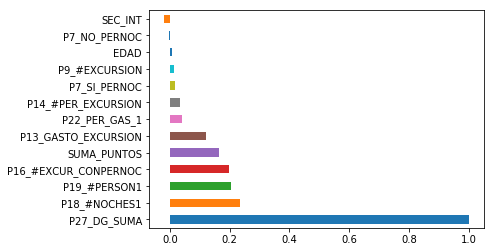

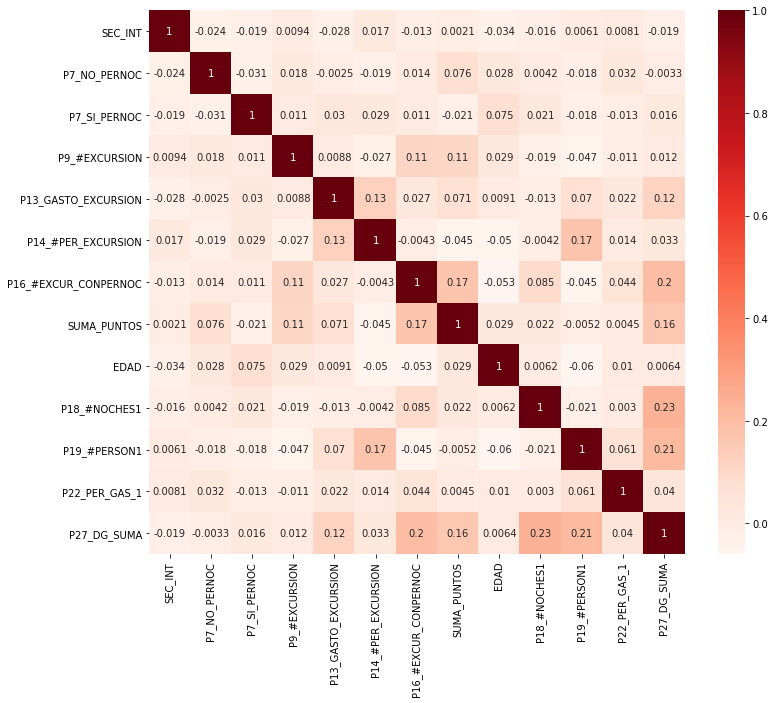

In [503]:
df_corr_health = ds.corr()['P27_DG_SUMA'].sort_values(ascending=False).head(30)

top_corr_features = df_corr_health.index# plot top 20 most correlated features to our target (HEALTH)
df_corr_health.plot(kind='barh')
#plt.show()        # export selected features to .csv

#df_corr_health.to_csv('feature_selection_CORRELATION.csv')print(df_corr_health)
#print(df_corr_health)

plt.figure(figsize=(12,10))
cor = ds.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()



/home/itsky/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/itsky/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


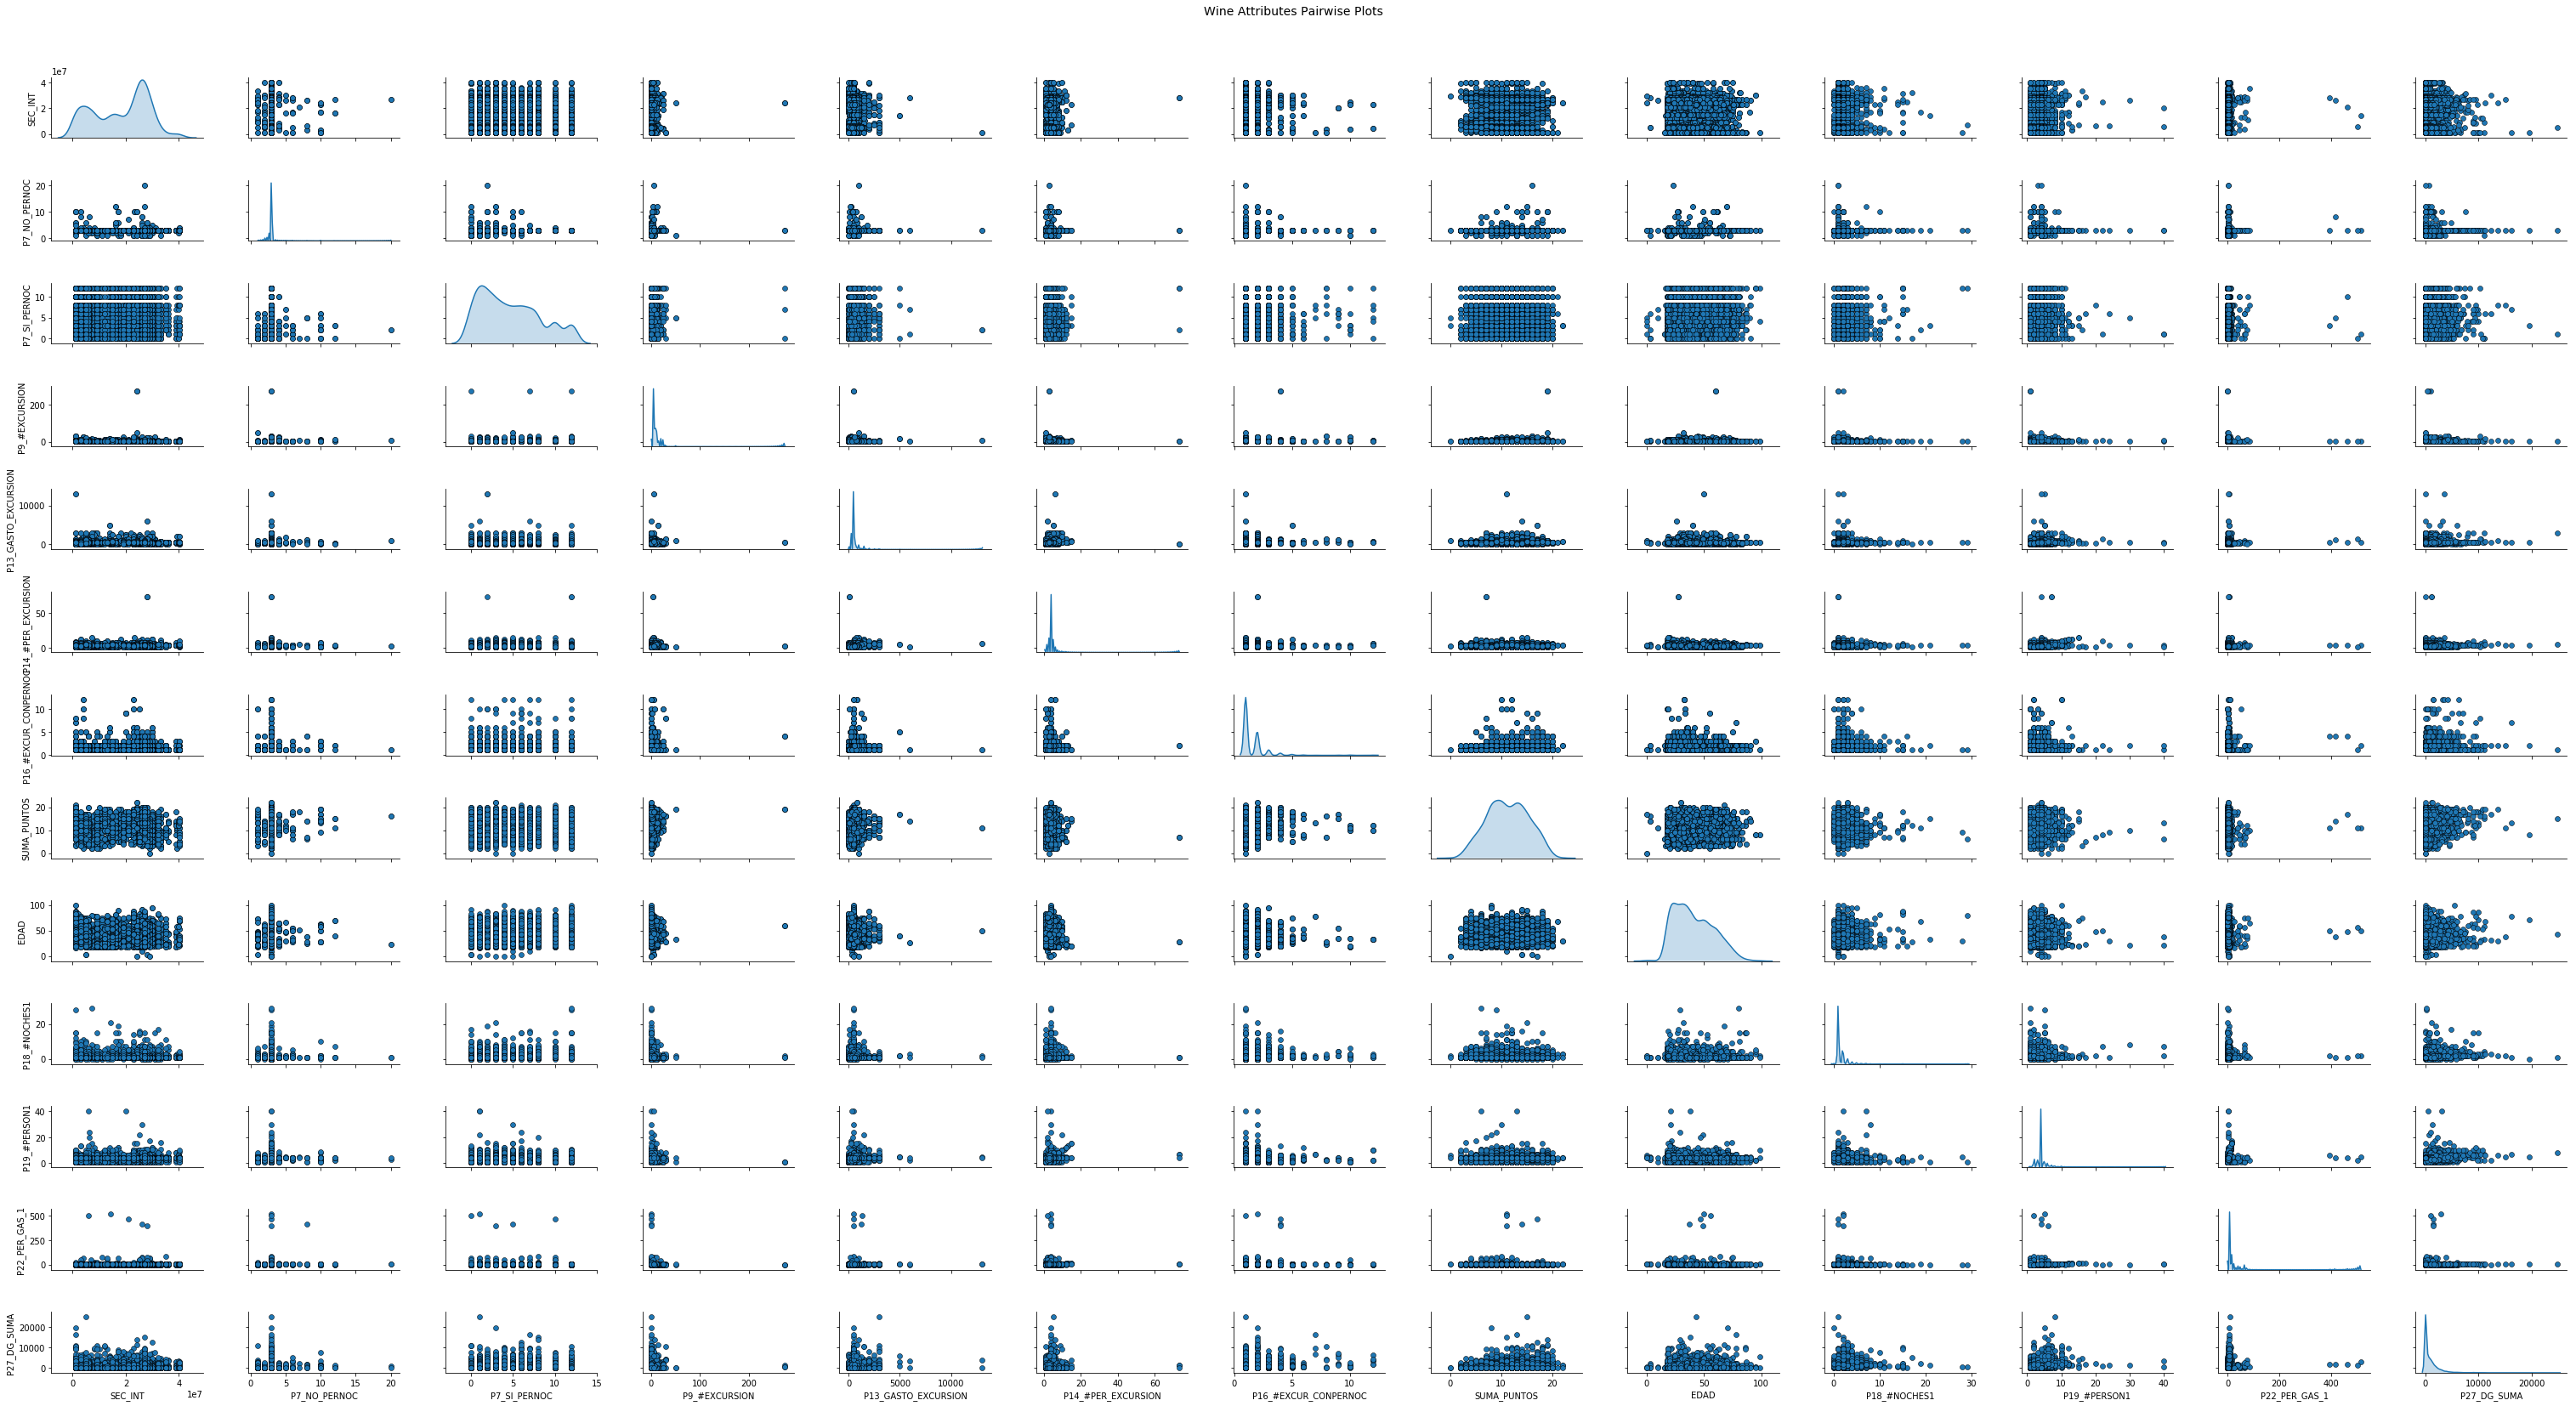

In [516]:
#cols = ['P2$01', 'P3$01', 'P4', 'P5', 'P9', 'P16','OCUPACION','GENERO']
pp = sns.pairplot(ds, size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

In [517]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

#cols = [ 'P5', 'P9', 'P16']
subset_df = ds

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, ds['GENERO']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'GENERO', color=('#FFE333', '#FF9999'))

ValueError: could not convert string to float: 'Vacaciones personales'